In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("../../amazon_reviews_us_Grocery_v1_00.tsv", sep='\t', quoting=3)
df = df[["product_id", "star_rating", "review_body"]]
df

product_id  star_rating  \
0        B000SAQCWC            5   
1        B00509LVIQ            5   
2        B00KHXESLC            5   
3        B000F8JIIC            5   
4        B004ZWR9RQ            5   
...             ...          ...   
2402453  B00004TBB0            4   
2402454  B00000K1X9            5   
2402455  B00000K1X9            5   
2402456  B00000K1X9            5   
2402457  B00000K1X9            5   

                                               review_body  
0        As a family allergic to wheat, dairy, eggs, nu...  
1        My favorite nut.  Creamy, crunchy, salty, and ...  
2        This green tea tastes so good! My girlfriend l...  
3        I love Melissa's brand but this is a great sec...  
4                                                     good  
...                                                    ...  
2402453  The Amor Belhom Duo are likely the only musici...  
2402454  Being  a  Breyer  collecter  almost  all  of  ...  
2402455  This model is beautiful.  each model is hand p...  
2402456  As a person who has collected Breyers all my l...  
2402457  This Breyer horse is wonderful. She is beautif...  

[2402458 rows x 3 columns]

In [35]:
data = df.dropna()
data = data.query('star_rating < 4', engine='python')
data = data.sample(100000)
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id  star_rating  \
100166   B007Y94GN2            2   
136734   B00KYFYKQQ            3   
1143475  B00ICTLFJ6            1   
1887238  B004W7JMEM            3   
51146    B001H9N1LS            1   
...             ...          ...   
314970   B00RW6P5OQ            1   
1406105  B005K4Q1VI            3   
2197954  B001EQ4PS2            3   
2088895  B003DNL9SI            3   
1824876  B0001LQJZI            3   

                                               review_body  
100166   Tastes awful. Not at all what I expected. Very...  
136734   Ok I have to say these taste very good, but no...  
1143475  Okay. Shipping and packaging were excellent. G...  
1887238  Tasty but the condition it arrived in was... q...  
51146    Doesn't sparkle as expected. Melts on icing. D...  
...                                                    ...  
314970   I don't see anywhere on the sales page to ask ...  
1406105  So I'm not sure this is a problem with the pro...  
2197954  While I love Eight O'Clock coffee, and this on...  
2088895  We drink all the flavors of Crystal Light and ...  
1824876  not the real English product... allso over pri...  

[100000 rows x 3 columns]

In [36]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = data["review_body"]
data

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100166     Tastes awful. Not at all what I expected. Very...
136734     Ok I have to say these taste very good, but no...
1143475    Okay. Shipping and packaging were excellent. G...
1887238    Tasty but the condition it arrived in was... q...
51146      Doesn't sparkle as expected. Melts on icing. D...
                                 ...                        
314970     I don't see anywhere on the sales page to ask ...
1406105    So I'm not sure this is a problem with the pro...
2197954    While I love Eight O'Clock coffee, and this on...
2088895    We drink all the flavors of Crystal Light and ...
1824876    not the real English product... allso over pri...
Name: review_body, Length: 100000, dtype: object

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


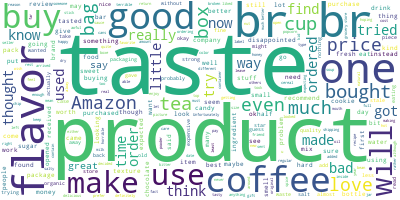

In [37]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [38]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Tastes',
  'awful',
  '.',
  'Not',
  'at',
  'all',
  'what',
  'I',
  'expected',
  '.',
  'Very',
  'weak',
  'flavor',
  '.'],
 ['Ok',
  'I',
  'have',
  'to',
  'say',
  'these',
  'taste',
  'very',
  'good',
  ',',
  'but',
  'not',
  'in',
  'the',
  'Kuerig',
  'which',
  'does',
  "n't",
  'give',
  'you',
  'the',
  'full',
  'flavor',
  'of',
  'the',
  'coffee',
  'that',
  'is',
  'real',
  'ground',
  'coffee',
  'not',
  'instant',
  'powder',
  'like',
  'Grove',
  'Square',
  'k',
  'cups',
  '.',
  'The',
  'water',
  'from',
  'the',
  'Kuerig',
  'runs',
  'through',
  'much',
  'too',
  'quickly',
  'and',
  'makes',
  'it',
  'weak',
  '.',
  'Since',
  'I',
  'have',
  'money',
  'tied',
  'up',
  'in',
  'Green',
  'Mountain',
  'and',
  'Grove',
  'Square',
  'coffee',
  ',',
  'I',
  'will',
  'make',
  'the',
  'best',
  'of',
  'a',
  'bad',
  'situation',
  'and',
  'give',
  'the',
  'Grove',
  'Square',
  'to',
  'my',
  'grandson',
  'who',
  'loves'

In [39]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tastes',
  'awful',
  '.',
  'not',
  'at',
  'all',
  'what',
  'i',
  'expected',
  '.',
  'very',
  'weak',
  'flavor',
  '.'],
 ['ok',
  'i',
  'have',
  'to',
  'say',
  'these',
  'taste',
  'very',
  'good',
  ',',
  'but',
  'not',
  'in',
  'the',
  'kuerig',
  'which',
  'does',
  "n't",
  'give',
  'you',
  'the',
  'full',
  'flavor',
  'of',
  'the',
  'coffee',
  'that',
  'is',
  'real',
  'ground',
  'coffee',
  'not',
  'instant',
  'powder',
  'like',
  'grove',
  'square',
  'k',
  'cups',
  '.',
  'the',
  'water',
  'from',
  'the',
  'kuerig',
  'runs',
  'through',
  'much',
  'too',
  'quickly',
  'and',
  'makes',
  'it',
  'weak',
  '.',
  'since',
  'i',
  'have',
  'money',
  'tied',
  'up',
  'in',
  'green',
  'mountain',
  'and',
  'grove',
  'square',
  'coffee',
  ',',
  'i',
  'will',
  'make',
  'the',
  'best',
  'of',
  'a',
  'bad',
  'situation',
  'and',
  'give',
  'the',
  'grove',
  'square',
  'to',
  'my',
  'grandson',
  'who',
  'loves'

In [40]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('tastes', 'NOUN'),
  ('awful', 'VERB'),
  ('.', '.'),
  ('not', 'ADV'),
  ('at_NEG', 'ADP'),
  ('all_NEG', 'DET'),
  ('what_NEG', 'PRON'),
  ('i_NEG', 'NOUN'),
  ('expected_NEG', 'VERB'),
  ('.', '.'),
  ('very', 'ADV'),
  ('weak', 'ADJ'),
  ('flavor', 'NOUN'),
  ('.', '.')],
 [('ok', 'NOUN'),
  ('i', 'NOUN'),
  ('have', 'VERB'),
  ('to', 'PRT'),
  ('say', 'VERB'),
  ('these', 'DET'),
  ('taste', 'NOUN'),
  ('very', 'ADV'),
  ('good', 'ADJ'),
  (',', '.'),
  ('but', 'CONJ'),
  ('not', 'ADV'),
  ('in_NEG', 'ADP'),
  ('the_NEG', 'DET'),
  ('kuerig_NEG', 'NOUN'),
  ('which_NEG', 'DET'),
  ('does_NEG', 'VERB'),
  ("n't_NEG", 'ADV'),
  ('give_NEG', 'VERB'),
  ('you_NEG', 'PRON'),
  ('the_NEG', 'DET'),
  ('full_NEG', 'ADJ'),
  ('flavor_NEG', 'NOUN'),
  ('of_NEG', 'ADP'),
  ('the_NEG', 'DET'),
  ('coffee_NEG', 'NOUN'),
  ('that_NEG', 'DET'),
  ('is_NEG', 'VERB'),
  ('real_NEG', 'ADJ'),
  ('ground_NEG', 'NOUN'),
  ('coffee_NEG', 'NOUN'),
  ('not_NEG', 'ADV'),
  ('instant_NEG', 'ADJ'),
  ('p

In [42]:
data_words = remove_stopwords(negated_tagged)
data_words

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('tastes', 'NOUN'),
  ('awful', 'VERB'),
  ('expected_NEG', 'VERB'),
  ('weak', 'ADJ'),
  ('flavor', 'NOUN')],
 [('ok', 'NOUN'),
  ('say', 'VERB'),
  ('taste', 'NOUN'),
  ('good', 'ADJ'),
  ('kuerig_NEG', 'NOUN'),
  ('give_NEG', 'VERB'),
  ('full_NEG', 'ADJ'),
  ('flavor_NEG', 'NOUN'),
  ('coffee_NEG', 'NOUN'),
  ('real_NEG', 'ADJ'),
  ('ground_NEG', 'NOUN'),
  ('coffee_NEG', 'NOUN'),
  ('instant_NEG', 'ADJ'),
  ('powder_NEG', 'NOUN'),
  ('like_NEG', 'ADP'),
  ('grove_NEG', 'NOUN'),
  ('square_NEG', 'NOUN'),
  ('k_NEG', 'NOUN'),
  ('cups_NEG', 'NOUN'),
  ('water', 'NOUN'),
  ('kuerig', 'NOUN'),
  ('runs', 'VERB'),
  ('much', 'ADV'),
  ('quickly', 'ADV'),
  ('makes', 'VERB'),
  ('weak', 'ADJ'),
  ('since', 'ADP'),
  ('money', 'NOUN'),
  ('tied', 'VERB'),
  ('green', 'ADJ'),
  ('mountain', 'NOUN'),
  ('grove', 'VERB'),
  ('square', 'ADJ'),
  ('coffee', 'NOUN'),
  ('make', 'VERB'),
  ('best', 'ADJ'),
  ('bad', 'ADJ'),
  ('situation', 'NOUN'),
  ('give', 'VERB'),
  ('grove', 'NOUN'),
  (

In [43]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ' or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tastes', 'awful', 'expected_NEG', 'weak', 'flavor'],
 ['ok',
  'say',
  'taste',
  'good',
  'kuerig_NEG',
  'give_NEG',
  'full_NEG',
  'flavor_NEG',
  'coffee_NEG',
  'real_NEG',
  'ground_NEG',
  'coffee_NEG',
  'instant_NEG',
  'powder_NEG',
  'grove_NEG',
  'square_NEG',
  'k_NEG',
  'cups_NEG',
  'water',
  'kuerig',
  'runs',
  'much',
  'quickly',
  'makes',
  'weak',
  'money',
  'tied',
  'green',
  'mountain',
  'grove',
  'square',
  'coffee',
  'make',
  'best',
  'bad',
  'situation',
  'give',
  'grove',
  'square',
  'grandson',
  'loves',
  'sweet',
  'coffee',
  'use',
  'melitta',
  'coffee',
  'maker',
  'make',
  'green',
  'mountain',
  'coffee',
  'brings',
  'flavor',
  'empty',
  'k',
  'cups',
  'time',
  'cup',
  'coffee',
  'filter',
  'pour',
  'boiling',
  'water',
  'grounds',
  'stick',
  'melitta',
  'finish',
  'green',
  'mountain',
  'never',
  'ever_NEG',
  'buy_NEG',
  'k_NEG',
  'cup_NEG',
  'kind_NEG',
  'go',
  'back',
  'mixture',
  'dunkin'

In [58]:
hazardous_words=["rotten", "mouldy", "moldy", "mold", "mould", "sick", "dangerous", "diarrhea", "poisoning", "stale"]

hazardous_reviews = [review for review in data_words if any(substring in review for substring in hazardous_words)]
hazardous_reviews
    

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['noodles',
  'recieved',
  'stale',
  'flavorful',
  'stale',
  'taste',
  'overpowered',
  'everything',
  'try',
  'store'],
 ['patties', 'extremely', 'thin', 'peanuts', 'stale'],
 ['never',
  'tried_NEG',
  'gevalia_NEG',
  'coffee_NEG',
  'wo_NEG',
  'ever_NEG',
  'purchase_NEG',
  'back',
  'mid-80s',
  'superfresh',
  'stores',
  'sold',
  'premium',
  'vanilla',
  'almond',
  'coffee',
  'world',
  'whole',
  'bean',
  'coffee',
  'included',
  'almond',
  'slices',
  'beans',
  'brewing',
  'aroma',
  'filled',
  'room',
  'flavor',
  'wonderful',
  'company',
  'went',
  'business',
  'trying',
  'find',
  'coffee',
  'ever',
  'latest',
  'attempt',
  'gevalia',
  'might',
  'claim',
  'coffee',
  'vanilla',
  'almond',
  'could',
  'call',
  'name',
  'extra_NEG',
  'flavor_NEG',
  'ca',
  'smell_NEG',
  'vanilla_NEG',
  'almond_NEG',
  'open_NEG',
  'bag_NEG',
  'ca_NEG',
  'smell_NEG',
  'brewing_NEG',
  'certainly_NEG',
  'ca_NEG',
  'taste_NEG',
  'tastes',
  'stale',


In [59]:
# Create Dictionary
id2word = corpora.Dictionary(hazardous_reviews)
# Create Corpus
texts = hazardous_reviews
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(5, 1),
  (13, 4),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 6),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(5, 1), (81, 1), (82, 1)],
 [(5, 1),
  (7, 1),
  (8, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88,

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.026*"stale" + 0.011*"taste" + 0.010*"would" + 0.006*"product" + '
  '0.005*"ordered" + 0.005*"tasted" + 0.005*"candy" + 0.005*"received" + '
  '0.005*"amazon" + 0.004*"disappointed"'),
 (1,
  '0.014*"stale" + 0.011*"coffee" + 0.008*"product" + 0.007*"would" + '
  '0.005*"taste" + 0.004*"good" + 0.004*"sick" + 0.004*"bought" + '
  '0.004*"flavor" + 0.003*"rice"'),
 (2,
  '0.008*"stale" + 0.004*"product" + 0.004*"oil" + 0.004*"box" + 0.004*"tea" + '
  '0.004*"time" + 0.003*"even" + 0.003*"bag" + 0.003*"amazon" + 0.003*"mold"'),
 (3,
  '0.024*"stale" + 0.008*"date" + 0.008*"tasted" + 0.006*"expiration" + '
  '0.006*"amazon" + 0.005*"good" + 0.005*"bought" + 0.005*"old" + '
  '0.005*"product" + 0.004*"box"'),
 (4,
  '0.024*"stale" + 0.007*"coffee" + 0.006*"taste" + 0.006*"disappointed" + '
  '0.005*"chocolate" + 0.005*"product" + 0.005*"bag" + 0.005*"first" + '
  '0.005*"buy_NEG" + 0.005*"really"'),
 (5,
  '0.017*"stale" + 0.005*"love" + 0.005*"got" + 0.005*"good" + 0.005*"would"

In [61]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.026*"stale" + 0.011*"taste" + 0.010*"would" + 0.006*"product" + '
  '0.005*"ordered" + 0.005*"tasted" + 0.005*"candy" + 0.005*"received" + '
  '0.005*"amazon" + 0.004*"disappointed"'),
 (1,
  '0.014*"stale" + 0.011*"coffee" + 0.008*"product" + 0.007*"would" + '
  '0.005*"taste" + 0.004*"good" + 0.004*"sick" + 0.004*"bought" + '
  '0.004*"flavor" + 0.003*"rice"'),
 (2,
  '0.008*"stale" + 0.004*"product" + 0.004*"oil" + 0.004*"box" + 0.004*"tea" + '
  '0.004*"time" + 0.003*"even" + 0.003*"bag" + 0.003*"amazon" + 0.003*"mold"'),
 (3,
  '0.024*"stale" + 0.008*"date" + 0.008*"tasted" + 0.006*"expiration" + '
  '0.006*"amazon" + 0.005*"good" + 0.005*"bought" + 0.005*"old" + '
  '0.005*"product" + 0.004*"box"'),
 (4,
  '0.024*"stale" + 0.007*"coffee" + 0.006*"taste" + 0.006*"disappointed" + '
  '0.005*"chocolate" + 0.005*"product" + 0.005*"bag" + 0.005*"first" + '
  '0.005*"buy_NEG" + 0.005*"really"'),
 (5,
  '0.017*"stale" + 0.005*"love" + 0.005*"got" + 0.005*"good" + 0.005*"would"

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''